In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 9s - loss: 3.2300 - accuracy: 0.0625
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 2s 59ms/step - loss: 3.2602 - accuracy: 0.0546 - val_loss: 3.2362 - val_accuracy: 0.0633
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2501 - accuracy: 0.0312
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 3.2514 - accuracy: 0.0520 - val_loss: 3.2269 - val_accuracy: 0.0686
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2226 - accuracy: 0.0781
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 3.2354 - accuracy: 0.0555 - val_loss: 3.2186 - val_accuracy: 0.0607
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2239 - accuracy: 0.0781
Epoch 4: sav

9/9 [==============================] - 0s 19ms/step - loss: 2.9118 - accuracy: 0.1295 - val_loss: 2.8494 - val_accuracy: 0.1715
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.8794 - accuracy: 0.1406
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 2.8992 - accuracy: 0.1339 - val_loss: 2.8347 - val_accuracy: 0.1715
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.9144 - accuracy: 0.0938
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 2.8987 - accuracy: 0.1242 - val_loss: 2.8197 - val_accuracy: 0.1847
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.9296 - accuracy: 0.1094
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.8818 - accuracy: 0.1463 - val_loss: 2.

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.6509 - accuracy: 0.1797
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.6206 - accuracy: 0.1974 - val_loss: 2.3972 - val_accuracy: 0.3113
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.5788 - accuracy: 0.2031
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.6061 - accuracy: 0.1894 - val_loss: 2.3845 - val_accuracy: 0.3166
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.5908 - accuracy: 0.1875
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.5724 - accuracy: 0.2018 - val_loss: 2.3689 - val_accuracy: 0.2982
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.6120 - accuracy: 0.1953
Epoch

1/9 [==>...........................] - ETA: 0s - loss: 2.7151 - accuracy: 0.1484
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 2.4371 - accuracy: 0.2370 - val_loss: 2.1509 - val_accuracy: 0.3747
Epoch 84/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4130 - accuracy: 0.2500
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.4266 - accuracy: 0.2405 - val_loss: 2.1408 - val_accuracy: 0.3668
Epoch 85/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4639 - accuracy: 0.2656
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 2.4539 - accuracy: 0.2238 - val_loss: 2.1344 - val_accuracy: 0.3773
Epoch 86/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4077 - accuracy: 0.3047
Epoch 86: saving mo

1/9 [==>...........................] - ETA: 0s - loss: 2.3622 - accuracy: 0.2344
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.3437 - accuracy: 0.2467 - val_loss: 2.0187 - val_accuracy: 0.4670
Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2970 - accuracy: 0.2344
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 2.3324 - accuracy: 0.2546 - val_loss: 2.0072 - val_accuracy: 0.4670
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.3819 - accuracy: 0.2188
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.3332 - accuracy: 0.2537 - val_loss: 1.9984 - val_accuracy: 0.4565
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.3984 - accuracy: 0.2266
Epoch 113: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.3053 - accuracy: 0.2734
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.3041 - accuracy: 0.2740 - val_loss: 1.9069 - val_accuracy: 0.5013
Epoch 138/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2190 - accuracy: 0.3203
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.2553 - accuracy: 0.2714 - val_loss: 1.8983 - val_accuracy: 0.4987
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2051 - accuracy: 0.2422
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.2882 - accuracy: 0.2670 - val_loss: 1.8907 - val_accuracy: 0.5066
Epoch 140/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4606 - accuracy: 0.3047
Epoch 140: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1195 - accuracy: 0.3203
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 2.1926 - accuracy: 0.3066 - val_loss: 1.8254 - val_accuracy: 0.5515
Epoch 165/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1999 - accuracy: 0.3125
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.2004 - accuracy: 0.2987 - val_loss: 1.8221 - val_accuracy: 0.5383
Epoch 166/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0719 - accuracy: 0.2500
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.1815 - accuracy: 0.2916 - val_loss: 1.8169 - val_accuracy: 0.5277
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0828 - accuracy: 0.3047
Epoch 167: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.3384 - accuracy: 0.2031
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.2003 - accuracy: 0.2872 - val_loss: 1.7755 - val_accuracy: 0.5409
Epoch 192/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0815 - accuracy: 0.3672
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 2.1634 - accuracy: 0.3093 - val_loss: 1.7717 - val_accuracy: 0.5435
Epoch 193/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0364 - accuracy: 0.3750
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 24ms/step - loss: 2.1692 - accuracy: 0.3110 - val_loss: 1.7663 - val_accuracy: 0.5462
Epoch 194/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1390 - accuracy: 0.3438
Epoch 194: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.2060 - accuracy: 0.2578
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 2.1619 - accuracy: 0.2943 - val_loss: 1.7082 - val_accuracy: 0.5673
Epoch 219/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0735 - accuracy: 0.3125
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 2.0957 - accuracy: 0.3233 - val_loss: 1.7057 - val_accuracy: 0.5699
Epoch 220/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2226 - accuracy: 0.3203
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 2.1287 - accuracy: 0.3181 - val_loss: 1.7057 - val_accuracy: 0.5594
Epoch 221/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1359 - accuracy: 0.4141
Epoch 221: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.3680 - accuracy: 0.2656
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 2.1731 - accuracy: 0.2899 - val_loss: 1.6788 - val_accuracy: 0.5620
Epoch 246/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1215 - accuracy: 0.2812
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 2.1272 - accuracy: 0.3286 - val_loss: 1.6789 - val_accuracy: 0.5726
Epoch 247/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1301 - accuracy: 0.3984
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 28ms/step - loss: 2.1308 - accuracy: 0.3128 - val_loss: 1.6771 - val_accuracy: 0.5831
Epoch 248/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0442 - accuracy: 0.3516
Epoch 248: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1229 - accuracy: 0.3828
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 27ms/step - loss: 2.0775 - accuracy: 0.3260 - val_loss: 1.6567 - val_accuracy: 0.5963
Epoch 273/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2106 - accuracy: 0.3438
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 2.0737 - accuracy: 0.3524 - val_loss: 1.6534 - val_accuracy: 0.5884
Epoch 274/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0852 - accuracy: 0.3359
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 26ms/step - loss: 2.1220 - accuracy: 0.3216 - val_loss: 1.6539 - val_accuracy: 0.5805
Epoch 275/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1331 - accuracy: 0.3750
Epoch 275: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1375 - accuracy: 0.3125
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.0450 - accuracy: 0.3489 - val_loss: 1.6077 - val_accuracy: 0.5937
Epoch 300/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1004 - accuracy: 0.3125
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.0419 - accuracy: 0.3524 - val_loss: 1.6070 - val_accuracy: 0.5858
Epoch 301/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9140 - accuracy: 0.3984
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 27ms/step - loss: 2.0520 - accuracy: 0.3374 - val_loss: 1.6132 - val_accuracy: 0.6069
Epoch 302/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1152 - accuracy: 0.3516
Epoch 302: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0027 - accuracy: 0.3828
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.0252 - accuracy: 0.3383 - val_loss: 1.5927 - val_accuracy: 0.5673
Epoch 327/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0012 - accuracy: 0.3281
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.1093 - accuracy: 0.3278 - val_loss: 1.5960 - val_accuracy: 0.5752
Epoch 328/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9586 - accuracy: 0.3906
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.0132 - accuracy: 0.3551 - val_loss: 1.5969 - val_accuracy: 0.5778
Epoch 329/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0916 - accuracy: 0.2734
Epoch 329: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0329 - accuracy: 0.3359
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 22ms/step - loss: 2.0210 - accuracy: 0.3489 - val_loss: 1.5755 - val_accuracy: 0.6042
Epoch 354/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9512 - accuracy: 0.3516
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 20ms/step - loss: 2.0257 - accuracy: 0.3480 - val_loss: 1.5792 - val_accuracy: 0.6016
Epoch 355/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9852 - accuracy: 0.3750
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 1.9882 - accuracy: 0.3445 - val_loss: 1.5774 - val_accuracy: 0.6042
Epoch 356/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9587 - accuracy: 0.3672
Epoch 356: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.2918 - accuracy: 0.2969
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.1133 - accuracy: 0.3498 - val_loss: 1.5621 - val_accuracy: 0.6069
Epoch 381/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0208 - accuracy: 0.3750
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 1.9377 - accuracy: 0.3612 - val_loss: 1.5693 - val_accuracy: 0.5858
Epoch 382/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0092 - accuracy: 0.3281
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 2.0046 - accuracy: 0.3401 - val_loss: 1.5654 - val_accuracy: 0.5989
Epoch 383/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9761 - accuracy: 0.3203
Epoch 383: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0500 - accuracy: 0.3672
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.0055 - accuracy: 0.3489 - val_loss: 1.5448 - val_accuracy: 0.5963
Epoch 408/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0354 - accuracy: 0.3125
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.0476 - accuracy: 0.3392 - val_loss: 1.5413 - val_accuracy: 0.5963
Epoch 409/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0886 - accuracy: 0.3516
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 1.9699 - accuracy: 0.3674 - val_loss: 1.5417 - val_accuracy: 0.6016
Epoch 410/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1545 - accuracy: 0.3203
Epoch 410: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0762 - accuracy: 0.3750
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 1.9739 - accuracy: 0.3392 - val_loss: 1.5102 - val_accuracy: 0.6121
Epoch 435/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0682 - accuracy: 0.3203
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.0192 - accuracy: 0.3498 - val_loss: 1.5116 - val_accuracy: 0.6201
Epoch 436/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9789 - accuracy: 0.3438
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 1.9690 - accuracy: 0.3621 - val_loss: 1.5140 - val_accuracy: 0.6201
Epoch 437/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9480 - accuracy: 0.3359
Epoch 437: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0362 - accuracy: 0.3438
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.0049 - accuracy: 0.3454 - val_loss: 1.5218 - val_accuracy: 0.6069
Epoch 462/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0347 - accuracy: 0.3438
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 1.9844 - accuracy: 0.3621 - val_loss: 1.5237 - val_accuracy: 0.6016
Epoch 463/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9701 - accuracy: 0.3672
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 1.9922 - accuracy: 0.3639 - val_loss: 1.5242 - val_accuracy: 0.6174
Epoch 464/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0541 - accuracy: 0.3281
Epoch 464: sa

1/9 [==>...........................] - ETA: 0s - loss: 1.9663 - accuracy: 0.3438
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 1.9756 - accuracy: 0.3595 - val_loss: 1.5040 - val_accuracy: 0.6280
Epoch 489/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.8976 - accuracy: 0.4453
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 1.9330 - accuracy: 0.3815 - val_loss: 1.5013 - val_accuracy: 0.6280
Epoch 489: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 3ms/step - loss: 1.5013 - accuracy: 0.6280


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 96ms/step
[3.40022981e-01 2.82394537e-03 1.99860744e-02 1.19419629e-03
 3.30750868e-02 8.20678100e-03 2.17260713e-05 1.97449253e-07
 7.40342289e-02 5.00831790e-02 1.14031124e-03 2.77077165e-02
 5.48717566e-02 7.29615837e-02 5.82320653e-02 5.55532170e-04
 1.63625809e-05 9.74341383e-05 1.22837976e-01 7.16371536e-02
 1.68269144e-05 3.18968290e-04 2.19068916e-05 4.06633923e-03
 4.59801033e-02 1.00895250e-02]
0


# Confusion matrix

12/12 [==============================] - 0s 2ms/step


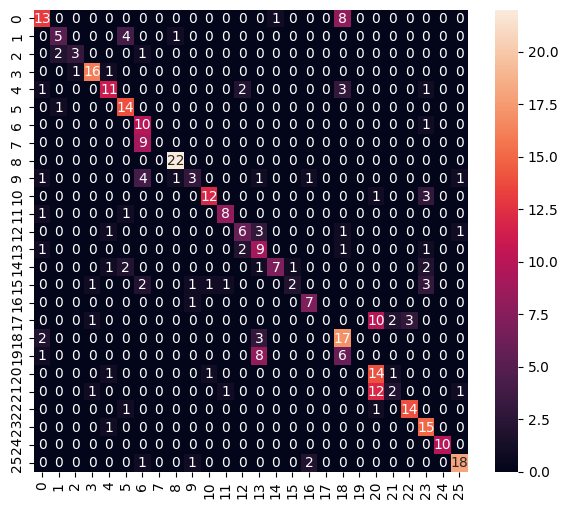

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.62      0.50      0.56        10
           2       0.75      0.50      0.60         6
           3       0.84      0.89      0.86        18
           4       0.69      0.61      0.65        18
           5       0.64      0.93      0.76        15
           6       0.37      0.91      0.53        11
           7       0.00      0.00      0.00         9
           8       0.92      1.00      0.96        22
           9       0.50      0.25      0.33        12
          10       0.86      0.75      0.80        16
          11       0.80      0.80      0.80        10
          12       0.60      0.50      0.55        12
          13       0.36      0.64      0.46        14
          14       0.88      0.50      0.64        14
          15       0.67      0.18      0.29        11
          16       0.70      0.88      0.78         8
     

C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpegxfb9in\assets


INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmpegxfb9in\assets


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4002310e-01 2.8239472e-03 1.9986082e-02 1.1941978e-03 3.3075102e-02
 8.2067801e-03 2.1726013e-05 1.9744893e-07 7.4034192e-02 5.0083164e-02
 1.1403126e-03 2.7707728e-02 5.4871764e-02 7.2961569e-02 5.8232084e-02
 5.5553205e-04 1.6362568e-05 9.7434073e-05 1.2283796e-01 7.1637131e-02
 1.6826903e-05 3.1896841e-04 2.1906899e-05 4.0663392e-03 4.5980055e-02
 1.0089527e-02]
0
